In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
clauses = []

num_literal = 0
num_clauses = 0

with open('SAT2018/Biere/sdiv15prop.cnf') as file:
    for line in file:
        if(line[0] == 'p'):
            l = line.split()
            num_literal = int(l[2])
            num_clauses = int(l[3])
        if(line[0] != 'p' and line[0] != '%' and line[0] != 'c'):
            clause = [int(digit) for digit in line.split()]
            clauses.append(clause[:-1])

In [3]:
def first(a, b):
    return a / (a + b)

def second(a, b):
    return a * (a + 1) / ((a + b + 1) * (a + b))

def solve(first, second):
    tau =  (second - first)/(first**2 - second)
    a = first * tau
    b = tau - a
    return a, b

In [4]:
second(0.5, 0.5)

0.375

In [5]:
epochs = 100

In [6]:
first_moment = np.asarray([0.5] * num_literal)
second_moment = np.asarray([0.375] * num_literal)
def update_clause(input_clause):
    length_clause = len(input_clause)
    
    p = 1.0
    
    for i in range(length_clause):
        lit = input_clause[i]
        if(lit > 0):
            p = p * (1 - first_moment[abs(lit)-1])
        else:
            p = p * first_moment[abs(lit)-1]

    
    for i in range(length_clause):
        lit = input_clause[i]
        M1 = first_moment[abs(lit)-1]
        left_extre = 0.001
        right_extre = 0.999
        if(M1 < left_extre or M1 > right_extre):
            continue
        M2 = second_moment[abs(lit)-1]
        #M3 = third_moment[abs(lit)-1]


        #epsilon = 0.1

        if(lit > 0):
            p_omit = p / (1 - M1)
            first_moment[abs(lit)-1] =  (M1 - p_omit * (M1 - M2))/ (1 - p)
            #second_moment[abs(lit)-1] = (M2 - p_omit * (M2 - M3)) / (1 - p)
            left = first_moment[abs(lit)-1]**2
            right = first_moment[abs(lit)-1]
            second_moment[abs(lit)-1] = (left + right)/2
            #second_moment[abs(lit)-1]  = random.uniform(left, right)
        else:
            p_omit = p / M1
            first_moment[abs(lit)-1] = (M1 - p_omit * M2) / (1 - p)
            left = first_moment[abs(lit)-1]**2
            right = first_moment[abs(lit)-1]
            #second_moment[abs(lit)-1] = np.random.beta(5, 5) * (right - left) + left
            #second_moment[abs(lit)-1] = np.random.uniform(left, right)
            second_moment[abs(lit)-1] = (left + right)/2
            #second_moment[abs(lit)-1]  = random.uniform(left, right)


        #print(first_moment[abs(lit)-1], second_moment[abs(lit)-1])

In [7]:
satisfied = np.zeros(epochs)

In [8]:
def satisfied_clauses():
    polarity = np.zeros(num_literal)
    for k in range(num_literal):
        if(first_moment[k] > 0.5):
            polarity[k] = 1
        else:
            polarity[k] = -1
    num_satisfied = 0
    for k in range(num_clauses):
        clause = clauses[k]
        for l in clause:
            if(l * polarity[abs(l) - 1] > 0):
                num_satisfied += 1
                break
    return num_satisfied

In [9]:
for k in range(epochs):
    for clause in clauses:
        update_clause(clause)
    satisfied[k] = satisfied_clauses()

In [10]:
satisfied

array([7621., 8074., 8629., 8790., 8908., 8970., 9006., 9025., 9047.,
       9062., 9074., 9086., 9098., 9100., 9102., 9104., 9104., 9105.,
       9105., 9105., 9107., 9109., 9109., 9109., 9109., 9110., 9112.,
       9112., 9113., 9114., 9114., 9115., 9115., 9115., 9115., 9115.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116., 9116.,
       9116.])

In [67]:
import matplotlib.pyplot as plt


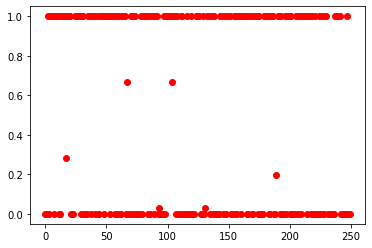

In [68]:
plt.plot(first_moment, 'ro')
plt.show()

In [69]:
first_moment

array([5.57299547e-04, 6.77418642e-04, 9.99000053e-01, 9.99317791e-04,
       9.99466229e-01, 9.99346257e-01, 9.99330414e-01, 9.65787373e-04,
       9.99480242e-01, 9.99464602e-01, 9.99040697e-01, 8.89612532e-04,
       6.32560943e-04, 9.99442703e-01, 9.99000323e-01, 9.99351227e-01,
       9.99122625e-01, 2.83780068e-01, 9.99430585e-01, 9.99314295e-01,
       9.99422728e-01, 6.69734469e-04, 5.92601337e-04, 7.28836658e-04,
       9.99000390e-01, 9.99120678e-01, 9.99381302e-01, 9.99353124e-01,
       9.99099554e-01, 9.14404990e-04, 9.99079477e-01, 9.99420438e-01,
       9.73237038e-04, 6.75867769e-04, 6.36403964e-04, 9.99227560e-01,
       9.99390881e-01, 7.22351748e-04, 9.99023576e-01, 9.99096343e-01,
       9.99116801e-01, 7.21378155e-04, 9.99190507e-01, 8.13984528e-04,
       9.99980502e-04, 9.99009948e-01, 9.99302341e-01, 9.99139079e-01,
       9.99880450e-04, 9.99050258e-01, 9.99303349e-01, 9.99462822e-01,
       9.99285161e-01, 5.70493567e-04, 9.99049282e-01, 9.99355350e-01,
      

In [321]:
num_clauses

219071

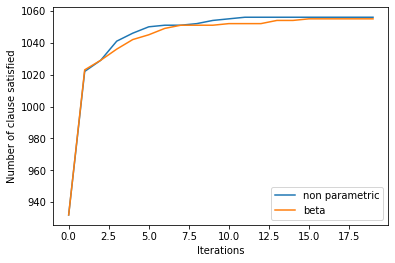

In [281]:
x = range(20)
plt.plot(x, satisfied, label ="non parametric")
plt.plot(x, satisfied1, label = "beta")
plt.xlabel("Iterations")
plt.ylabel("Number of clause satisfied")
plt.legend()
plt.show()